# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:

**RA**: 


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [129]:
#import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import analise_exploratoria as ae
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [130]:
# Leitura dos dados
data = pd.read_csv('datasets/RHP_data.csv')

# Visualização dos dados
data.head()

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,15/10/09,21/04/09,0.5,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,23/01/09,24/10/99,9.6,Sulam,Normais,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


In [131]:
# Quantidade de dados nulos
data.isnull().sum()

Id                   0
Peso               318
Altura               0
IMC               4727
Atendimento        983
DN                1376
IDADE             1376
Convenio          5304
PULSOS            1198
PA SISTOLICA      7730
PA DIASTOLICA     7740
PPA                217
B2                1179
SOPRO             1167
FC                2041
HDA 1             5414
HDA2             17221
SEXO                 4
MOTIVO1           1097
MOTIVO2           4778
dtype: int64

In [132]:
# Estatísticas descritivas
data.describe()

,Id,Peso,Altura,IMC,PA SISTOLICA,PA DIASTOLICA
count,17873.000000,17555.000000,17873.000000,13146.000000,10143.000000,10133.000000
mean,8937.000000,21.163520,83.865216,17.806329,101.314108,62.303661
std,5159.635016,18.061021,56.583610,12.071950,15.510066,8.885555
min,1.000000,-40.000000,0.000000,0.000000,10.000000,6.000000
25%,4469.000000,6.600000,36.000000,15.000000,90.000000,60.000000
50%,8937.000000,18.000000,99.000000,17.000000,100.000000,60.000000
75%,13405.000000,31.000000,130.000000,19.000000,110.000000,70.000000
max,17873.000000,157.000000,198.000000,848.000000,990.000000,120.000000


In [133]:
# padronização dos nomes das colunas
ae.padronizar_colunas(data)

In [134]:
# Distribuição das classes
cols = ['convenio','pulsos','ppa','b2', 'sexo', 'sopro', 'hda_1', 'hda_2', 'motivo_1', 'motivo_2']

ae.analisar_distribuicao(data,['motivo_1', 'sexo'])


Distribuição de classes na coluna 'motivo_1':
motivo_1
5 - Parecer cardiológico           7981
6 - Suspeita de cardiopatia        5863
1 - Cardiopatia já estabelecida    1428
2 - Check-up                       1048
7 - Outro                           456
Name: count, dtype: int64


Distribuição de classes na coluna 'sexo':
sexo
M                8930
F                6612
Indeterminado    1417
Masculino         584
Feminino          247
masculino          79
Name: count, dtype: int64




### Entendendo os dados
- **ID**: Identificação do paciente
- **Peso**: Peso do paciente
- **Altura**: Altura do paciente
- **IMC**: Índice de Massa Corporal
- **Atendimento**: Data do atendimento
- **DN**: Data de nascimento
- **Idade**: Idade do paciente
- **Convenio**: Convênio do paciente
- **Pulsos**: Pulso do paciente
- **PA Sistólica**: Pressão Arterial Sistólica
- **PA Diastólica**: Pressão Arterial Diastólica
- **PPA**: Pressão de Pulso Arterial
- **B2**: 
- **Sopro**: Sopro cardíaco
- **FC**: Frequência Cardíaca
- **HDA 1**: História de Doença Atual 1
- **HDA 2**: História de Doença Atual 2
- **Sexo**: Sexo do paciente
- **Motivo 1**: Motivo 1 da consulta
- **Motivo 2**: Motivo 2 da consulta

## Removendo colunas desnecessárias

In [135]:
#dropar colunas que não serão utilizadas
data.drop(columns=['atendimento', 'dn','convenio','hda_2'], inplace=True)

## tratando dados nulos das colunas numericas


In [136]:
#colunas numericas
cols_numericas = ['peso', 'altura','idade', 'imc', 'pa_sistolica', 'pa_diastolica'] #fc tratar depois

#ae.tratar_dados_nulos(data, cols_numericas) todo: implementar essa função

for col in cols_numericas:
    data[col] = data[col].apply(lambda x: 0 if x == '#VALUE!' else float(x))
    data[col] = data[col].apply(lambda x: 0 if x < 0 else x)
    data[col] = data[col].fillna(0)

    
data[cols_numericas].isnull().sum()

peso             0
altura           0
idade            0
imc              0
pa_sistolica     0
pa_diastolica    0
dtype: int64

## tratando dados nulos das colunas categoricas

In [137]:
## TODO: implementar essa função
#colunas categoricas
cols_categoricas = [ 'pulsos', 'ppa', 'b2', 'sexo', 'sopro', 'hda_1', 'motivo_1', 'motivo_2']

for col in cols_categoricas:
    data[col] = data[col].replace('#VALUE!', pd.NA)
    data[col] = data[col].fillna('Nao informado')
    data[col] = data[col].apply(lambda x: x.lower())

# em sexo, substituir 'masculino' por 'm' e 'feminino' por 'f'
data['sexo'] = data['sexo'].replace('masculino', 'm')
data['sexo'] = data['sexo'].replace('feminino', 'f')





### limpeza dos dados

- Peso

In [138]:
data.shape

(17873, 16)

In [139]:
data_antes_drop = data.copy()

<Axes: xlabel='peso', ylabel='Count'>

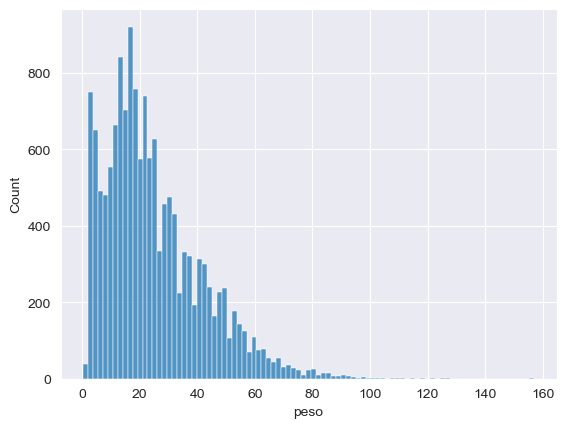

In [140]:
# removendo valores negativos
data = data[data['peso'] > 0] #analisando manualmente, quando os pesos sao 0, quase sempre a altura é 0 tambem, logo, são dados invalidos

#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['peso'])

<Axes: xlabel='peso', ylabel='Count'>

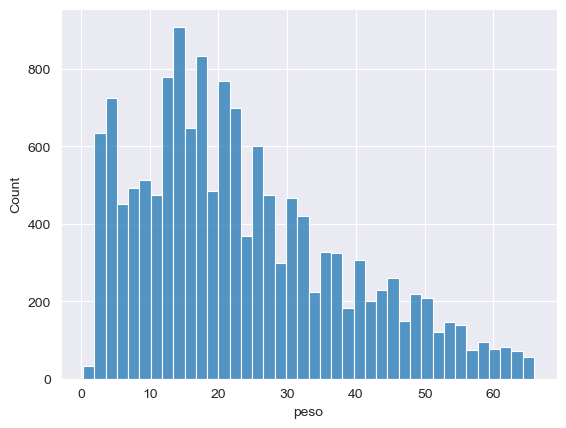

In [141]:
#ainda possui outliers para valores muito altos, então vamos remover
Q1 = data['peso'].quantile(0.25)
Q3 = data['peso'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
data = data[data['peso'] < limite_superior]

sns.histplot(data['peso'])

In [142]:
#TODO: REMOVER ESSA CELULA DPS
data.shape

(14570, 16)

### Limpando a altura

<Axes: xlabel='altura', ylabel='Count'>

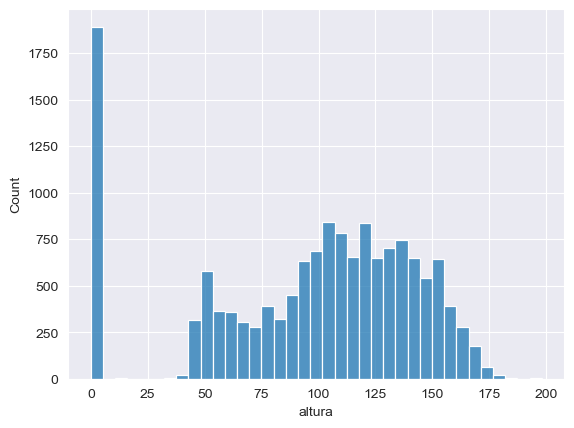

In [143]:
# plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['altura'])

In [144]:
#ver a quantidade de valores 0
data[(data['altura'] == 0)].shape

(1891, 16)

### Como para preencher os dados de altura usaremos a idade, vamos limpar idade antes

In [145]:
data.shape

(14570, 16)

In [146]:
#todo: implementar essa função
# tratando idade
#colocando valores negativos como 0
data['idade'] = data['idade'].apply(lambda x: 0 if x < 0 else x)

data = data[data['idade'] <= 19]

#removendo valores 0
data = data[data['idade'] > 0] #todo: talvez mudar isso, 727 dados excluidos

#transformando idade em inteiro
data['idade'] = data['idade'].apply(lambda x: int(x))

## agora com idade tratada, vamos preencher os valores de altura

In [147]:
#todo: implementar essa função
def preencher_alturas(data):
    # Filtrar dados com altura conhecida e desconhecida
    df_treino = data[data['altura'] > 0].copy()
    df_teste = data[data['altura'] == 0].copy()
    
    # Criar variáveis dummy para 'sexo' (caso seja categórico)
    df_treino = pd.get_dummies(df_treino, columns=['sexo'], drop_first=True)
    df_teste = pd.get_dummies(df_teste, columns=['sexo'], drop_first=True)

    # Garantir que ambos os conjuntos têm as mesmas colunas
    df_teste = df_teste.reindex(columns=df_treino.columns, fill_value=0)

    # Atualizar lista de features após dummies
    features = [col for col in df_treino.columns if col not in ['altura']]

    # Dividir dados de treino
    X_train = df_treino[features]
    y_train = df_treino['altura']

    # Treinar modelo
    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    modelo.fit(X_train, y_train)

    # Prever alturas ausentes
    X_test = df_teste[features]
    data.loc[data['altura'] == 0, 'altura'] = modelo.predict(X_test)

    return data

data_aux = data[[ 'altura', 'sexo', 'idade']].copy()
data_aux = preencher_alturas(data_aux)

data['altura'] = data_aux['altura']


<Axes: xlabel='altura', ylabel='Count'>

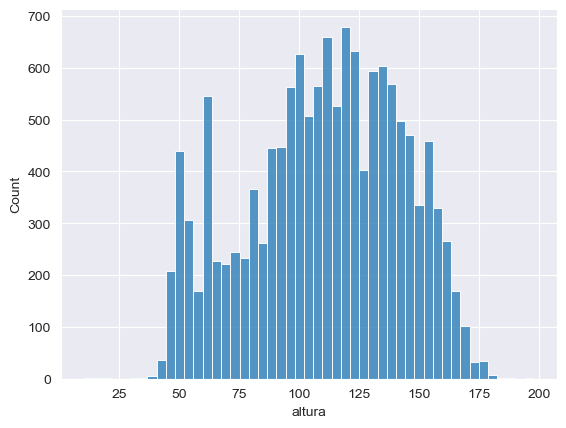

In [148]:
#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['altura'])

In [149]:
data.shape

(13796, 16)

### Limpando IMC

<Axes: xlabel='imc', ylabel='Count'>

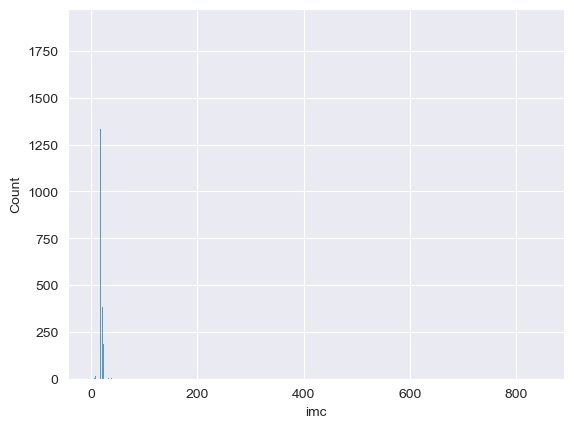

In [150]:
#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['imc'])

<Axes: xlabel='imc', ylabel='Count'>

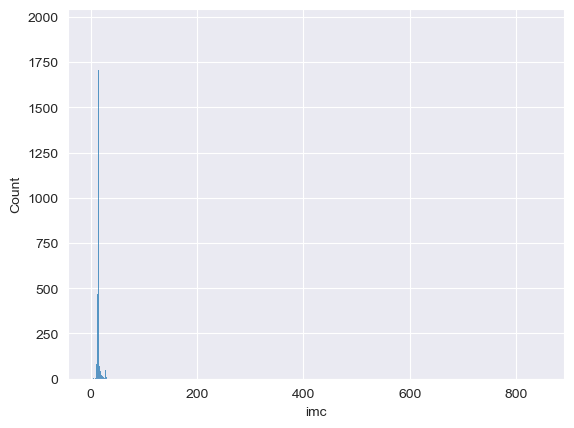

In [151]:
#tranformando em 0 os valores negativos
data['imc'] = data['imc'].apply(lambda x: 0 if x < 0 else x)

#como temos altura e peso, podemos calcular o IMC para os valores 0
data.loc[data['imc'] == 0, 'imc'] = data['peso'] / (((data['altura'])/100) ** 2)

#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['imc'])

## aparentemente existem alturas inconsistentes em relacao ao peso, vamos remover esses dados

<Axes: xlabel='imc', ylabel='Count'>

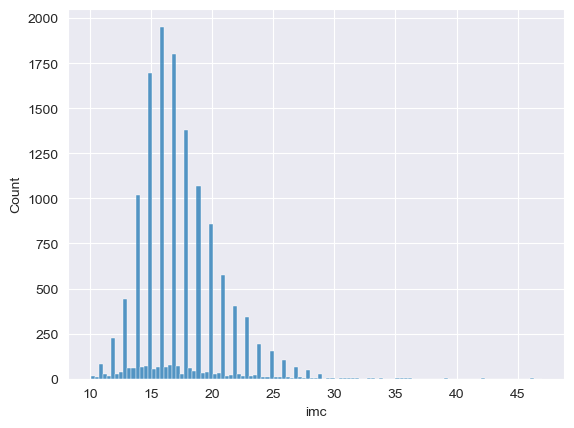

In [152]:
#removendo dados com imc <10, todo: talvez mudar isso, foi excluido muitos dados, +-1700
data = data[data['imc'] > 10]
data = data[data['imc'] < 50]

#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['imc'])

## limpando pulsos

In [153]:
ae.analisar_distribuicao(data, ['pulsos'])

Distribuição de classes na coluna 'pulsos':
pulsos
normais                13200
nao informado            331
amplos                    32
outro                     29
femorais diminuidos       28
diminuídos                11
Name: count, dtype: int64




In [154]:
#como são poucos dados como não informado, vamos remover
data = data[data['pulsos'] != 'nao informado']

In [155]:
data.shape

(13300, 16)

In [156]:
#breve limpeza dos dados medicos

#se fc tiver numero-numero, pegar o primeiro numero
data['fc'] = data['fc'].fillna(0)  # Substitui NaN por 0
data['fc'] = data['fc'].astype(str).str.split('-').str[0]  # Converte para string e pega a primeira parte antes do '-'
data['fc'] = data['fc'].astype(float)  # Converte de volta para float

In [157]:
#removendo outliers das colunas numericas
cols_numericas = ['pa_sistolica', 'pa_diastolica', 'fc']

for col in cols_numericas:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    data = data[data[col] < limite_superior]

## utilizando o knn para preencher os valores faltantes das demais colunas

In [158]:

# Definir os valores que representam nulos
null_values = {
    'pa_sistolica': 0.0,
    'pa_diastolica': 0.0,
    'fc': 0.0,
    'ppa': 'não calculado',
    'b2': 'nao informado',
    'sopro': 'ausente',
    'hda_1': 'nao informado',
    'motivo_1': 'nao informado',
    'motivo_2': 'nao informado'
}

encoded_df = data.copy()

# Substituir os valores que representam nulos por NaN
for col, null_val in null_values.items():
    encoded_df[col] = encoded_df[col].replace(null_val, np.nan)

# Separar as colunas numéricas e categóricas
numerical_cols = ['pa_sistolica', 'pa_diastolica', 'fc']
categorical_cols = ['ppa', 'b2', 'sopro', 'hda_1', 'motivo_1', 'motivo_2']

# Codificar as colunas categóricas como números para usar no KNN
categorical_mappings = {}
for col in categorical_cols:
    encoded_df[col], mapping = encoded_df[col].factorize()
    categorical_mappings[col] = mapping

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(encoded_df[numerical_cols + categorical_cols])

# Restaurar os valores imputados no DataFrame original
imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols + categorical_cols)

# Reverter a codificação das colunas categóricas
for col in categorical_cols:
    imputed_df[col] = imputed_df[col].round().astype(int)  # Arredondar para inteiros
    imputed_df[col] = categorical_mappings[col][imputed_df[col]].values




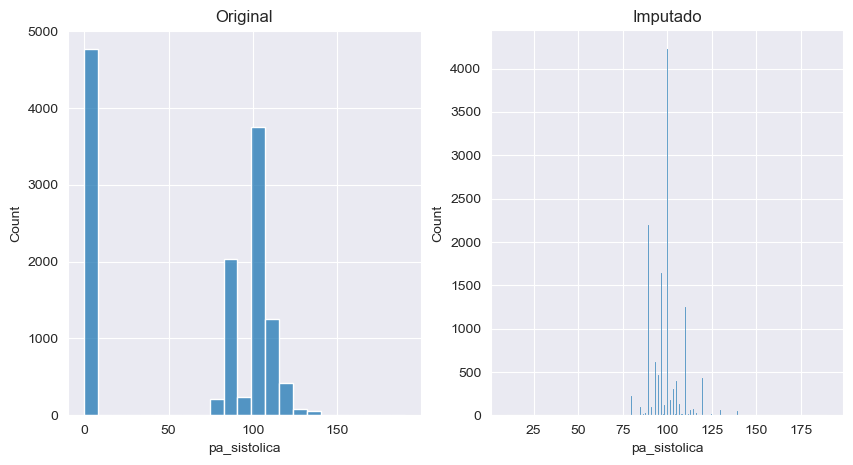

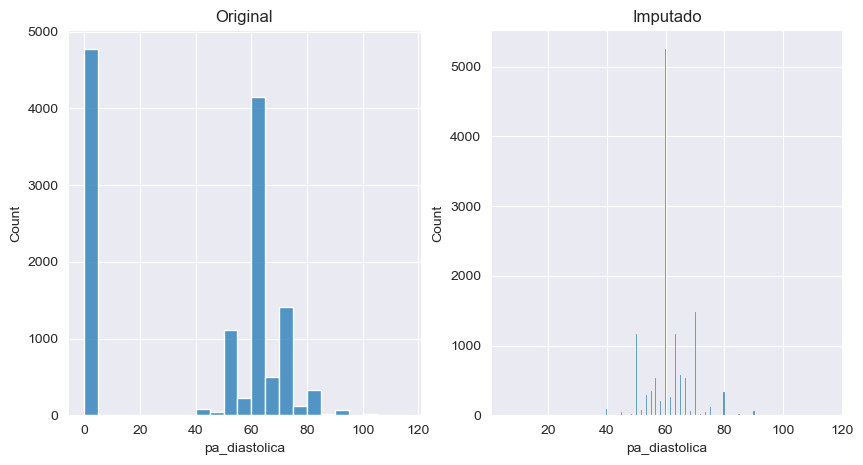

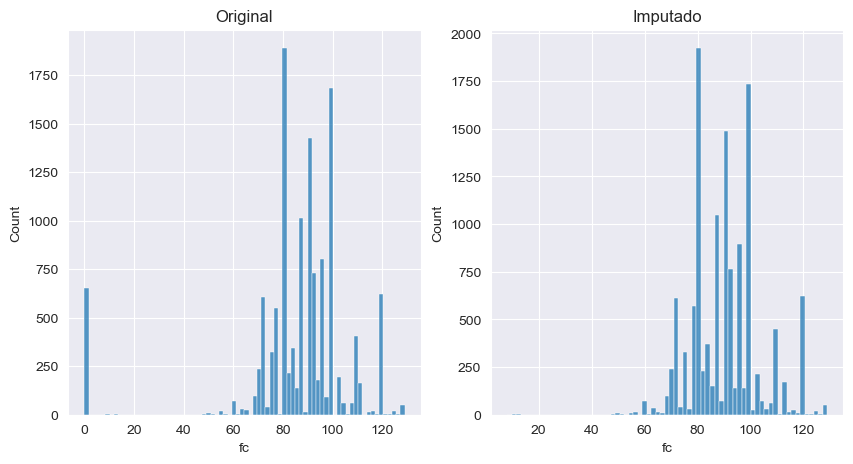

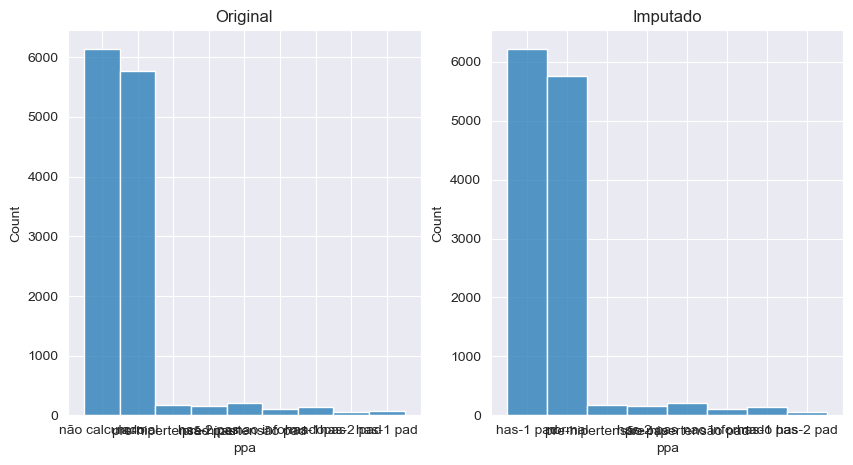

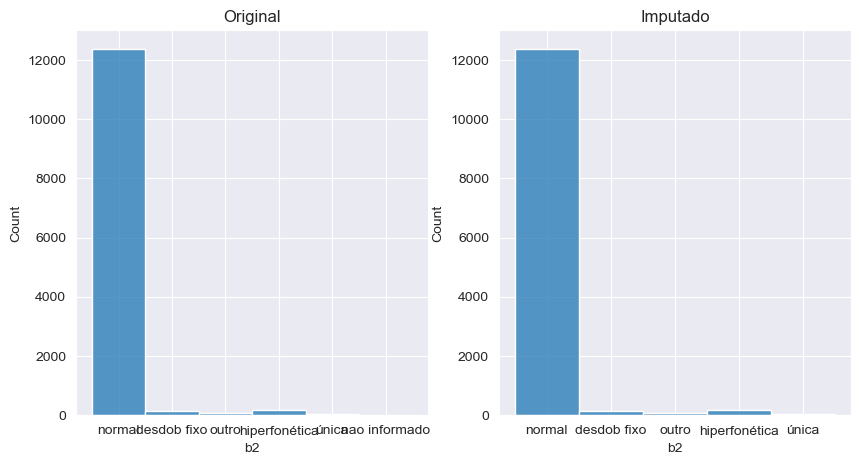

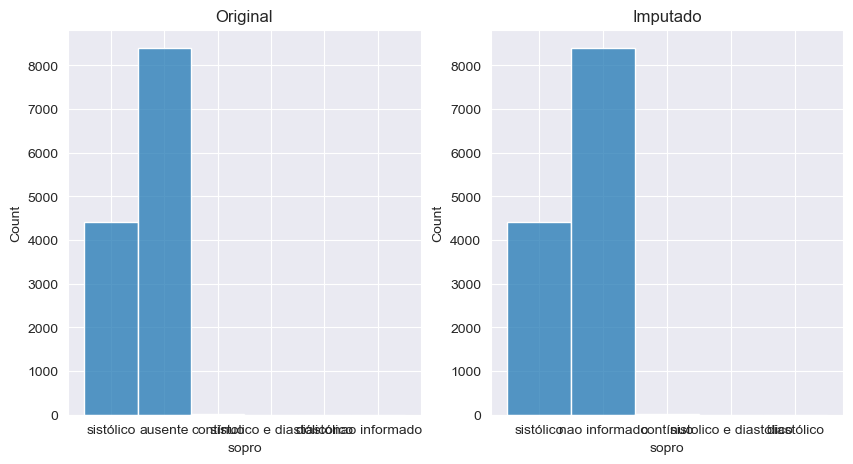

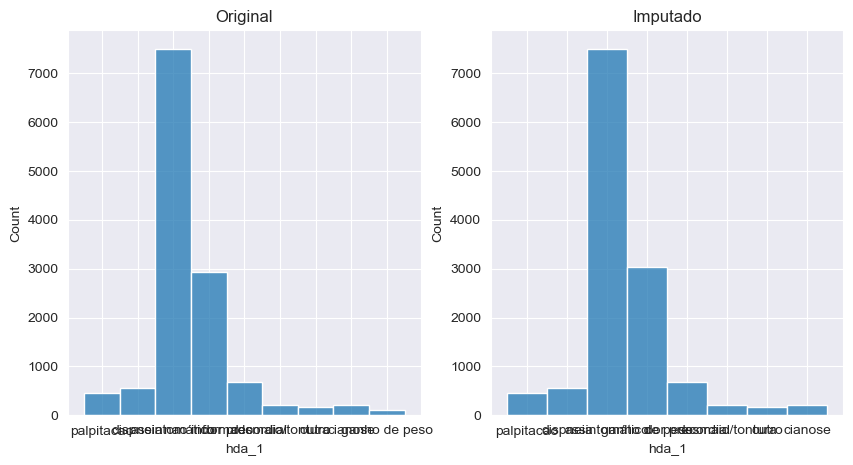

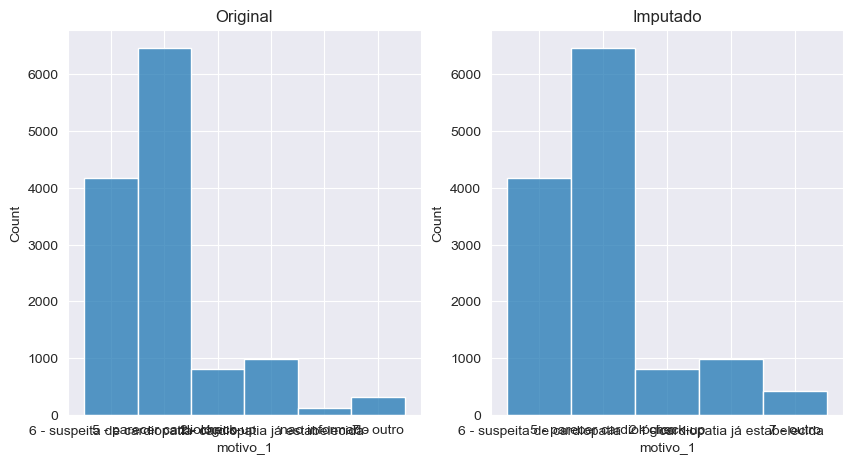

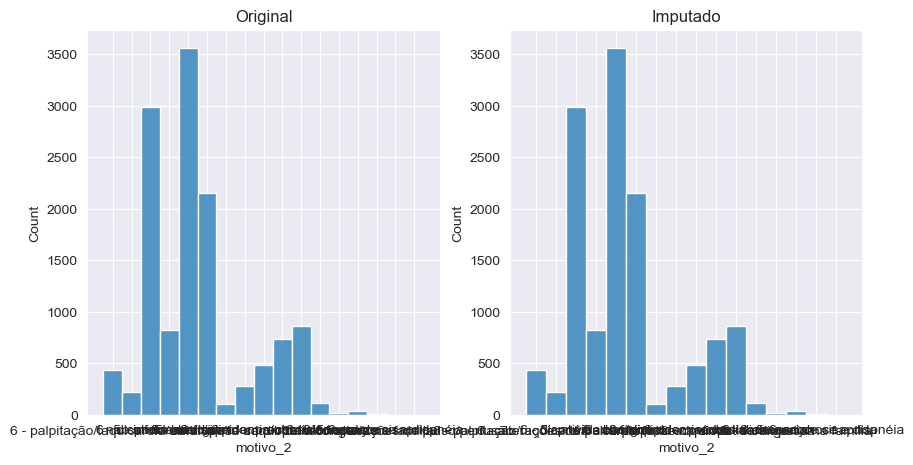

In [159]:
cols_graf = ['pa_sistolica', 'pa_diastolica', 'fc', 'ppa', 'b2', 'sopro', 'hda_1', 'motivo_1', 'motivo_2']

#faça graficos lado a lado de data e imputed_df

for col in cols_graf:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(data[col], ax=axes[0])
    axes[0].set_title('Original')
    sns.histplot(imputed_df[col], ax=axes[1])
    axes[1].set_title('Imputado')
    plt.show()

In [160]:
data = data.reset_index(drop=True)
imputed_df = imputed_df.reset_index(drop=True)

# Substituir os valores imputados no DataFrame original
for col in numerical_cols + categorical_cols:
    data[col] = imputed_df[col]

In [161]:
categorical_cols=categorical_cols+['sexo', 'pulsos']
#transformando as colunas categoricas em dummies
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data.head()

,id,peso,altura,imc,idade,pa_sistolica,pa_diastolica,fc,ppa_has-1 pas,ppa_has-2 pad,...,motivo_2_6 - palpitação/taquicardia/arritmia,motivo_2_6 - sopro,motivo_2_outro,sexo_indeterminado,sexo_m,sexo_nao informado,pulsos_diminuídos,pulsos_femorais diminuidos,pulsos_normais,pulsos_outro
0,1,5.0,51.0,19.0,0,103.333333,63.333333,112.0,False,False,...,True,False,False,False,True,False,False,False,True,False
1,2,3.5,50.0,14.0,0,98.333333,60.000000,128.0,False,False,...,False,False,False,False,True,False,False,False,True,False
2,4,8.1,65.0,19.0,0,93.333333,60.000000,92.0,False,False,...,False,False,False,False,True,False,False,False,True,False
3,5,39.5,142.0,20.0,9,85.000000,50.000000,90.0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,6,26.0,112.0,21.0,4,100.000000,60.000000,100.0,False,False,...,False,False,False,False,True,False,False,False,True,False


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [162]:
# Divisão dos dados em treino e teste
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#troca a coluna de nome Id por id para poder dar merge
df_train.rename(columns={'Id': 'id'}, inplace=True)

#se classe é Normais, trocar para Normal
df_train['CLASSE'] = df_train['CLASSE'].replace('Normais', 'Normal')

# Merge the 'CLASSE' column from df_train into data
data = data.merge(df_train[['id', 'CLASSE']], on='id', how='left')

# Filter the data to include only the IDs present in df_train
train_ids = df_train['id']
data_filtered = data[data['id'].isin(train_ids)]

# Split the filtered data into features (X) and target (y)
X_train = data_filtered.drop(columns=['CLASSE'])
Y_train = data_filtered['CLASSE']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform Y_train
Y_train = label_encoder.fit_transform(Y_train)

In [163]:
# ver a quantidade de valores de y
pd.Series(Y_train).value_counts()

1    6303
0    3976
2      18
Name: count, dtype: int64

In [164]:
# Converter Y_train para Series com o mesmo índice de X_train
Y_train = pd.Series(Y_train, index=X_train.index)

# Encontrar os índices onde Y_train é 2
indices = Y_train[Y_train == 2].index

# Remover as linhas correspondentes de X_train e Y_train
Y_train = Y_train.drop(indices)
X_train = X_train.drop(indices)

# Verificar se os tamanhos agora estão corretos
print(Y_train.value_counts())
print(X_train.shape, Y_train.shape)

1    6303
0    3976
Name: count, dtype: int64
(10279, 56) (10279,)


In [165]:
X_train.shape

(10279, 56)

In [166]:
Y_train.shape

(10279,)

#### Treinamento e avaliação dos modelos

In [167]:
# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [168]:
def evaluate_logistic_regression():
    model = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, Y_train)  
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train_scaled, Y_train, cv=5, scoring='accuracy'))

def evaluate_random_forest():
    model = RandomForestClassifier(random_state=42)
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train, Y_train, cv=5, scoring='accuracy'))

def evaluate_xgboost():
    model = XGBClassifier(eval_metric='logloss', tree_method="hist", random_state=42)
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train, Y_train, cv=5, scoring='accuracy'))

def evaluate_lightgbm():
    X_train_fixed = X_train.rename(columns=lambda x: x.replace(" ", "_"))
    
    model = LGBMClassifier(random_state=42, verbose=-1)
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [-1, 10, 20]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_fixed, Y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train_fixed, Y_train, cv=5, scoring='accuracy'))

def evaluate_catboost():
    model = CatBoostClassifier(verbose=0, random_state=42)
    param_grid = {'iterations': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [4, 6, 8]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train, Y_train, cv=5, scoring='accuracy'))

def evaluate_knn():
    model = KNeighborsClassifier()
    param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train, Y_train, cv=5, scoring='accuracy'))

def evaluate_svm():
    model = SVC(probability=True, random_state=42)
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, scoring='accuracy', n_jobs=-1, n_iter=5, random_state=42)
    randomized_search.fit(X_train, Y_train)
    return randomized_search.best_estimator_, np.mean(cross_val_score(randomized_search.best_estimator_, X_train, Y_train, cv=3, scoring='accuracy'))

def evaluate_neural_network():
    model = MLPClassifier(max_iter=1000, random_state=42)
    param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['tanh', 'relu'], 'alpha': [0.0001, 0.001, 0.01]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, Y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train_scaled, Y_train, cv=5, scoring='accuracy'))

def evaluate_naive_bayes():
    model = GaussianNB()
    return model, np.mean(cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy'))

def evaluate_stacking():
    stacking = StackingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)),
            ("rf", RandomForestClassifier(random_state=42)),
            ("xgb", XGBClassifier(eval_metric='logloss', tree_method="hist", random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
    )
    stacking.fit(X_train, Y_train)
    return stacking, np.mean(cross_val_score(stacking, X_train, Y_train, cv=5, scoring='accuracy'))

def evaluate_voting():
    voting = VotingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)),
            ("rf", RandomForestClassifier(random_state=42)),
            ("xgb", XGBClassifier(eval_metric='logloss', tree_method="hist", random_state=42))
        ],
        voting="soft"
    )
    voting.fit(X_train, Y_train)
    return voting, np.mean(cross_val_score(voting, X_train, Y_train, cv=5, scoring='accuracy'))

# Avaliação de cada modelo
results = {}
models = {
    "Logistic Regression": evaluate_logistic_regression,
    "Random Forest": evaluate_random_forest,
    "XGBoost": evaluate_xgboost,
    "LightGBM": evaluate_lightgbm,
    "CatBoost": evaluate_catboost,
    "KNN": evaluate_knn,
# "SVM": evaluate_svm, todo: demora muito, talvez testar mais tarde
    "Neural Network": evaluate_neural_network,
    "Naive Bayes": evaluate_naive_bayes,
    "Stacking": evaluate_stacking,
    "Voting": evaluate_voting
}

for name, func in models.items():
    print(f"Avaliando {name}...")
    model, mean_cv_score = func()
    results[name] = mean_cv_score

sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for model, acc in sorted_results.items():
    print(f"{model}: {acc:.4f}")

Avaliando Logistic Regression...
Avaliando Random Forest...
Avaliando XGBoost...
Avaliando LightGBM...
Avaliando CatBoost...
Avaliando KNN...
Avaliando Neural Network...
Avaliando Naive Bayes...
Avaliando Stacking...
Avaliando Voting...
XGBoost: 0.9371
Logistic Regression: 0.9358
LightGBM: 0.9358
CatBoost: 0.9358
Random Forest: 0.9354
Stacking: 0.9328
Naive Bayes: 0.9316
Neural Network: 0.9213
Voting: 0.9204
KNN: 0.4961


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

In [169]:
df_test.head()

,Id
0,8957
1,4246
2,9089
3,10606
4,9863


In [170]:
# Verificar se todos os IDs de df_test estão presentes em data
ids_test = df_test['Id']  # IDs de df_test
ids_data = data['id']     # IDs de data

# Encontrar IDs ausentes
ids_ausentes = ids_test[~ids_test.isin(ids_data)]

# Verificar se há IDs ausentes
if not ids_ausentes.empty:
    print("Os seguintes IDs de df_test estão ausentes em data:")
    print(ids_ausentes.tolist())
else:
    print("Todos os IDs de df_test estão presentes em data.")


Os seguintes IDs de df_test estão ausentes em data:
[11627, 1643, 6957, 15712, 2870, 15067, 17323, 2497, 4697, 17197, 3009, 15635, 17576, 10996, 14656, 10894, 11794, 11158, 10933, 17018, 17644, 2876, 13631, 1305, 15070, 4692, 8796, 6295, 16022, 10251, 12538, 13758, 9654, 850, 4958, 1177, 7085, 5572, 13472, 7713, 1828, 7418, 16241, 6204, 3897, 17451, 9064, 1087, 3327, 1602, 6452, 14870, 11460, 17531, 3747, 1810, 14866, 7592, 6261, 13608, 9615, 614, 903, 16186, 11688, 15813, 2396, 12520, 9556, 1774, 17709, 53, 11235, 3731, 10146, 10346, 14988, 7118, 1166, 12936, 13085, 9649, 14272, 14405, 2496, 13497, 15355, 12762, 14990, 15183, 10963, 5305, 15358, 15383, 9679, 12807, 15077, 10132, 6979, 1012, 4951, 8378, 12759, 7020, 15144, 8748, 6663, 15448, 12162, 13162, 7509, 12132, 11159, 3224, 1148, 2971, 7648, 1563, 11271, 3850, 16910, 10383, 8191, 11605, 12021, 3256, 3183, 8976, 4115, 897, 2293, 15108, 1289, 10055, 4540, 10074, 6604, 15091, 7690, 16811, 5730, 1977, 5815, 11633, 4876, 2538, 6203, 

In [171]:

# Recuperar as linhas dos IDs ausentes
linhas_restauradas = data_antes_drop[data_antes_drop['id'].isin(ids_ausentes)]

#limpar os dados das linhas restauradas transformando as colunas categoricas em dummies
linhas_restauradas = pd.get_dummies(linhas_restauradas, columns=categorical_cols, drop_first=True)

In [172]:
# Reindexar diretamente linhas_restauradas para ter as mesmas colunas que data
linhas_restauradas_ajustadas = linhas_restauradas.reindex(columns=data.columns)

# Adicionar as linhas restauradas ao data
data_restaurado = pd.concat([data, linhas_restauradas_ajustadas], ignore_index=True)


In [173]:
#transformar as colunas sopro_sistolico e diastólico, motivo_2_6 - alterações de pulso/perfusão, motivo_2_6 - cansaço, motivo_2_6 - cianose e dispnéia e pulsos_diminuídos em bool
# Lista de colunas a serem convertidas para bool
colunas_para_bool = [
    'sopro_sistolico e diastólico', 
    'motivo_2_6 - alterações de pulso/perfusão', 
    'motivo_2_6 - cansaço', 
    'motivo_2_6 - cianose e dispnéia', 
    'pulsos_diminuídos '
]

# Converter as colunas para o tipo bool
data_restaurado[colunas_para_bool] = data_restaurado[colunas_para_bool].astype(bool)

In [174]:

#se o tipo da coluna for bool, preencher com False os valores faltantes
for col in data_restaurado.columns:
    if data_restaurado[col].dtype == 'bool':
        data_restaurado[col] = data_restaurado[col].fillna(False)

data_restaurado.drop(columns=['CLASSE'], inplace=True)


In [175]:
data_restaurado.tail()

,id,peso,altura,imc,idade,pa_sistolica,pa_diastolica,fc,ppa_has-1 pas,ppa_has-2 pad,...,motivo_2_6 - palpitação/taquicardia/arritmia,motivo_2_6 - sopro,motivo_2_outro,sexo_indeterminado,sexo_m,sexo_nao informado,pulsos_diminuídos,pulsos_femorais diminuidos,pulsos_normais,pulsos_outro
13438,17620,0.0,0.0,0.0,2.77,0.0,0.0,88,False,False,...,False,True,False,False,True,False,True,False,True,False
13439,17632,3.1,50.0,12.0,0.00,0.0,0.0,90,False,False,...,False,True,False,False,False,False,True,False,True,False
13440,17644,31.0,143.0,15.0,0.00,90.0,60.0,84,False,False,...,False,False,False,False,True,False,True,False,True,False
13441,17690,87.0,179.0,27.0,17.91,140.0,100.0,90,False,False,...,False,False,False,False,True,False,True,False,True,False
13442,17709,59.0,152.0,26.0,12.91,0.0,0.0,NaN,False,False,...,False,False,False,False,True,False,True,False,False,False


In [183]:
# se peso, altura,idade,pa_sistolica, pa diastolica, imc forem 0, preencher com a mediana
cols_numericas = ['peso', 'altura', 'idade', 'pa_sistolica', 'pa_diastolica', 'imc']

for col in cols_numericas:
    data_restaurado[col] = data_restaurado[col].replace(0, np.nan)
    data_restaurado[col] = data_restaurado[col].fillna(data[col].median())
    #colocar o tipo como float
data_restaurado['fc'] = data_restaurado['fc'].astype(str).str.split('-').str[0]  # Converte para string e pega a primeira parte antes do '-'
data_restaurado['fc'] = data_restaurado['fc'].astype(float)  # Converte de volta para float
    

In [184]:
# Passo 1: Definir os parâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Passo 2: Configurar o GridSearchCV para otimização
grid_search = GridSearchCV(estimator=XGBClassifier(eval_metric='logloss', tree_method="hist", random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Passo 3: Ajustar o GridSearchCV nos dados de treino
grid_search.fit(X_train, Y_train)

# Passo 4: Obter o melhor modelo após a otimização
best_model = grid_search.best_estimator_

# Passo 5: Fazer previsões no X_test com o melhor modelo
df_test_ids = df_test['Id']
X_test_preparado = data_restaurado[data_restaurado['id'].isin(df_test_ids)]

# Remover a coluna 'id' para a previsão e alinhar as colunas com X_train
X_test_preparado = X_test_preparado.drop(columns=['id'], errors='ignore')
X_test_preparado = X_test_preparado.reindex(columns=X_train.columns, fill_value=0)

# Previsão no X_test
y_test_pred_prob = best_model.predict_proba(X_test_preparado)[:, 1]  # Pegando a probabilidade da classe positiva (1)

y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)

print(f"Acurácia no conjunto de treino: {train_accuracy:.4f}")


Acurácia no conjunto de treino: 0.9393


In [190]:
# Passo 3: Salvar as previsões no formato desejado (id e CLASSE)
df_test['Predicted'] = y_test_pred_prob
df_test[['Id', 'Predicted']].to_csv('submission.csv', index=False)